#YEAR 2024 PHIVOLCS LATEST EARTHQUAKE INFORMATION -Final Project

At this point, you are now at the final requirement of CMPSC 172 – Data Mining Course.  Your goal in this activity is to apply your knowledge in Data Mining by trying your skills to actual data.  For this exercise, you need to select a publicly available dataset and extract at least 5 insights from the data.  You need to discuss the data and the processes you applied to extract the information.  Remember that in Data Mining, your results must be reproducible.  This means that any data science professional can reproduce your results using your systematic processes.  Don’t forget to include a brief discussion of your insights.

Download the notebook template in our google repository and document all parts of your code using the text cell/section in Colab. Include a section to discuss your findings.

Submit the link to your notebook in mVLE with this email: mpburac@mmsu.edu.ph as your collaborator.


#Dataset Source:
######https://earthquake.phivolcs.dost.gov.ph/EQLatest-Monthly/2024/2024_January.html
######https://earthquake.phivolcs.dost.gov.ph/EQLatest-Monthly/2024/2024_February.html
######https://earthquake.phivolcs.dost.gov.ph/EQLatest-Monthly/2024/2024_March.html
######https://www.phivolcs.dost.gov.ph/index.php/earthquake/earthquake-information3





#Introduction
#####This data is about earthquake events in year 2024 and their characteristics, such as date and time of occurrence, latitude, longitude, depth, magnitude, and location description.

#Discussion
1. Date - Time (Philippine Time): The date and time of the earthquake event in Philippine Time.
2. Latitude (ºN) and Longitude (ºE): The geographical coordinates of the earthquake event.
3. Depth (km): The depth at which the earthquake occurred below the Earth's surface.
4. Magnitude: The magnitude of the earthquake, typically measured using the Richter scale.
5. Location: A description of the location of the earthquake event.

#Targets
1. Determine the strongest earthquake magnitude recorded in the dataset.

2. Analyze Magnitude Distribution: Calculate the distribution of earthquake magnitudes and identify any patterns.

3. Visualize the average depth of earthquakes over time using a heatmap.

4. Determine the number of earthquakes per month from January to May 2024, and can you provide the exact count of earthquakes for each month.

5. Location-Based Analysis: Investigate the distribution of earthquakes based on location descriptions to identify earthquake-prone areas.

#Analysis Plan
1. Identify the strongest earthquake magnitude recorded in the dataset.
- Find the earthquake record with the highest magnitude in the dataset.
- Use pandas to locate the row in the dataset corresponding to the earthquake with the highest magnitude.

2. Analyze Magnitude Distribution: Calculate the distribution of earthquake magnitudes and identify any patterns.
- Create a histogram or kernel density plot of earthquake magnitudes to visualize the distribution.
- Determine the shape of the distribution and look for any notable peaks or patterns.

3. Visualize the average depth of earthquakes over time using a heatmap, with the x-axis representing the day and the y-axis representing the month
- Extract the month and day from the date for grouping.
- Calculate the average depth of earthquakes for each month and day.
- Create a heatmap to visualize the average depth over time.

4. Count earthquakes monthly from January to May 2024 and provide the exact counts for each month.
- Extract the month from the date for grouping.
- Count the number of earthquakes for each month.
- Present the exact count of earthquakes for each month

5. Identify the Most Seismically Active Areas.
- Count the number of earthquakes for each location description.
- Use a barplot to visualize the distribution of earthquakes based on location descriptions.

## Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dwn_url= '/content/drive/MyDrive/DataMiningFinalProject/earthquake-2024_Jan-May27.csv'

dataset = pd.read_csv(dwn_url, encoding='latin1')


In [ ]:
dataset.head()

,Date - Time (Philippine Time),Latitude (ºN),Longitude (ºE),Depth (km),Magnitude,Location
0,27 May 2024 - 06:28 AM,13.71,120.57,100,2.5,015 km S 25° W of Calatagan (Batangas)
1,27 May 2024 - 06:25 AM,8.82,126.35,33,2.9,006 km N 67° E of Marihatag (Surigao Del Sur)
2,27 May 2024 - 05:06 AM,9.74,125.57,94,2.2,005 km N 21° W of Taganaan (Surigao Del Norte)
3,27 May 2024 - 05:06 AM,10.18,126.01,32,1.8,018 km N 10° W of Santa Monica (Surigao Del No...
4,27 May 2024 - 04:42 AM,6.18,126.97,34,2.4,112 km S 62° E of Governor Generoso (Davao Ori...


## Insight #1
#### Question 1: Determine the strongest earthquake magnitude recorded in the dataset.

In [ ]:
# Assuming the date-time format is 'YYYY-MM-DD HH:MM:SS'
dataset['Date - Time (Philippine Time)'] = pd.to_datetime(dataset['Date - Time (Philippine Time)'], format='%d %B %Y - %I:%M %p')

strongest_eq = dataset.loc[dataset['Magnitude'].idxmax()]
print("Strongest Earthquake (Year 2024):")
print("Date and Time:", strongest_eq['Date - Time (Philippine Time)'])
print("Location:", strongest_eq['Location'])
print("Coordinates (Latitude, Longitude):", strongest_eq['Latitude (ºN)'], strongest_eq['Longitude (ºE)'])
print("Depth (km):", strongest_eq['Depth (km)'])
print("Magnitude:", strongest_eq['Magnitude'])


Strongest Earthquake (Year 2024):
Date and Time: 2024-04-03 07:58:00
Location: 334 km N 03° W of Itbayat (Batanes)
Coordinates (Latitude, Longitude): 23.8 121.7
Depth (km): 11
Magnitude: 7.5


In [ ]:
#Based on the dataset from PHIVOLCS, this is the strongest earthquake recorded for this year 2024
#It struck north of Itbayat, Batanes on April 3rd at 7:58 AM, registering a whopping 7.5 Magnitude with a depth of 11km below the surface

# Insight #2
#### Question 2: Analyze Magnitude Distribution: Calculate the distribution of earthquake magnitudes and identify any patterns.

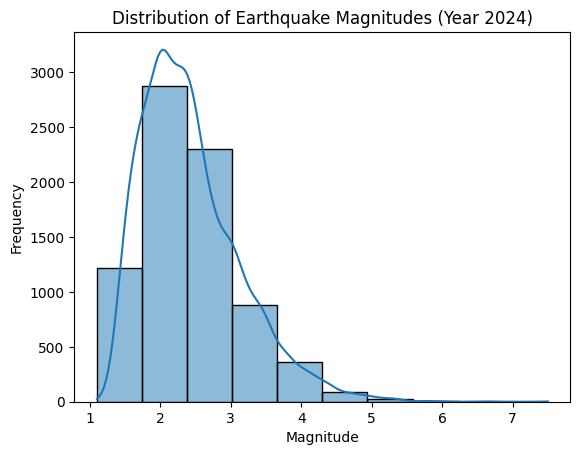

In [ ]:
sns.histplot(dataset['Magnitude'], bins=10, kde=True)
plt.title('Distribution of Earthquake Magnitudes (Year 2024)')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# There are significantly more earthquakes with a magnitude of 2 compared to magnitude 1.
# This distribution pattern is often observed in earthquake data, over 2500+ fall from magnitude 2, followed by magnitude 3

# Insight #3
#### Question 3: Determine the strongest earthquake magnitude recorded in the dataset.Visualize the average depth of earthquakes over time using a heatmap

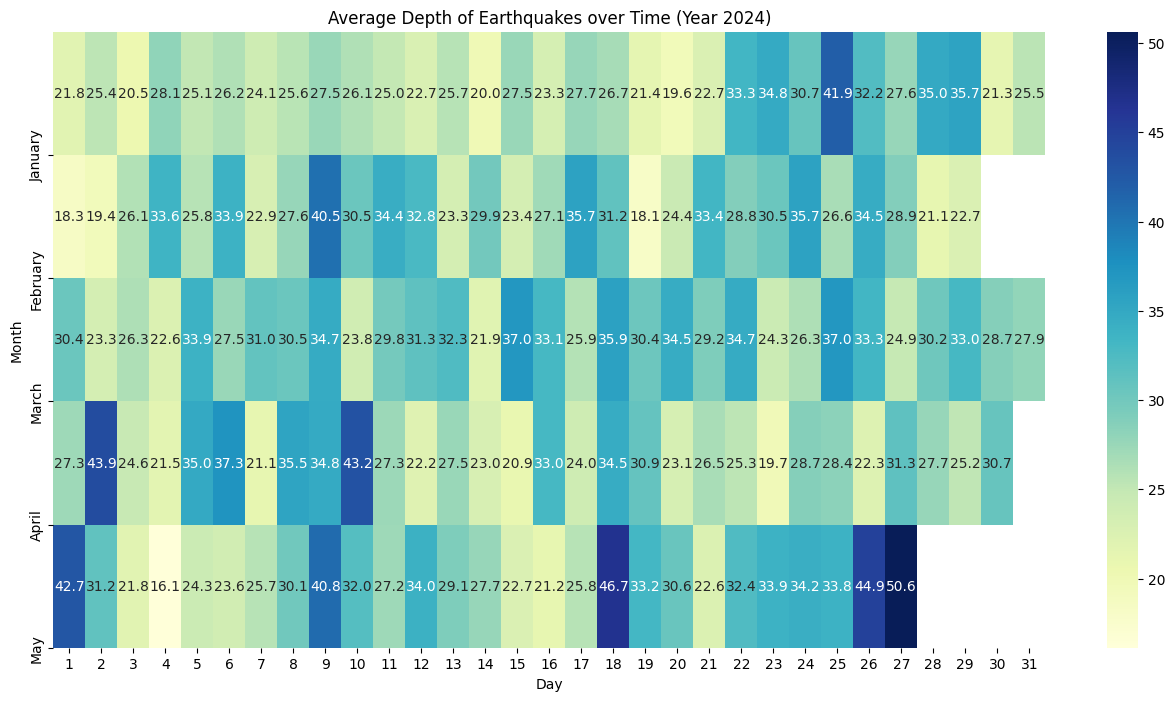

In [ ]:
# Assuming 'Date - Time (Philippine Time)' column is in datetime format
dataset['Date'] = pd.to_datetime(dataset['Date - Time (Philippine Time)'])
dataset['Month'] = dataset['Date'].dt.month
dataset['Day'] = dataset['Date'].dt.day

# Define month names
month_names = ['January', 'February', 'March', 'April', 'May']

# Calculate the average depth of earthquakes for each month and day
average_depth = dataset.groupby(['Month', 'Day'])['Depth (km)'].mean().unstack()

# Create a heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(average_depth, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Average Depth of Earthquakes over Time (Year 2024)')
plt.xlabel('Day')
plt.ylabel('Month')
plt.yticks(ticks=range(1, 6), labels=month_names)  # Set custom labels for y-axis
plt.show()

In [ ]:
# The heatmap shows that earthquakes in May tend to be deeper on average compared to other months
# As indicated by the cooler colors throughout the May row, May 18th has the deepest average depth with 46.7km

# Insight #4
#### Question 4: What is the observed trend in the number of earthquakes per month from January to May

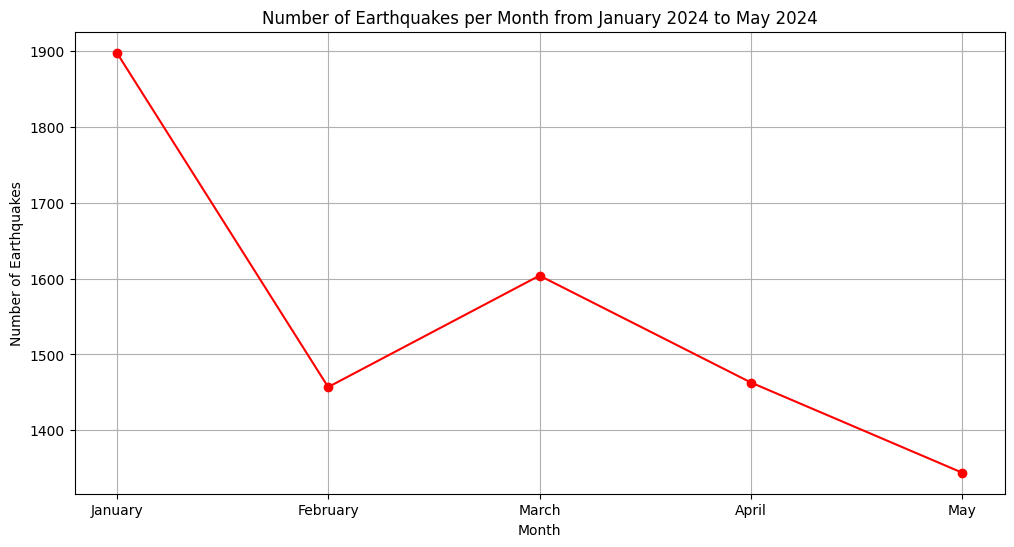

January: 1898 earthquakes
February: 1457 earthquakes
March: 1604 earthquakes
April: 1463 earthquakes
May: 1344 earthquakes


In [ ]:
# Extract month and day from the date
dataset['Day'] = dataset['Date - Time (Philippine Time)'].dt.day
dataset['Month'] = dataset['Date - Time (Philippine Time)'].dt.month
dataset['Date'] = dataset['Date - Time (Philippine Time)'].dt.date

# Count the number of earthquakes per month
earthquake_count_monthly = dataset['Month'].value_counts().sort_index()

# Define month names
month_names = ['January', 'February', 'March', 'April', 'May']

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(month_names, earthquake_count_monthly.values, marker='o', linestyle='-', color='red')
plt.xlabel('Month')
plt.ylabel('Number of Earthquakes')
plt.title('Number of Earthquakes per Month from January 2024 to May 2024')
plt.grid(True)
plt.show()

# Print the exact number of earthquakes each month
for month, count in zip(month_names, earthquake_count_monthly.values):
    print(f"{month}: {count} earthquakes")


In [ ]:
# Monthly Comparison: The data shows a decreasing trend in the number of earthquakes from January 2024 to May 2024. This pattern could indicate a gradual decrease in seismic activity over the analyzed period.
# January experienced the highest number of earthquakes compared to the other months, with 1898 recorded earthquakes. This could indicate a period of increased seismic activity at the beginning of the year.


# Insight #5
#### Question 5: Indetify the Top 10 Location experiencing the most earthquakes

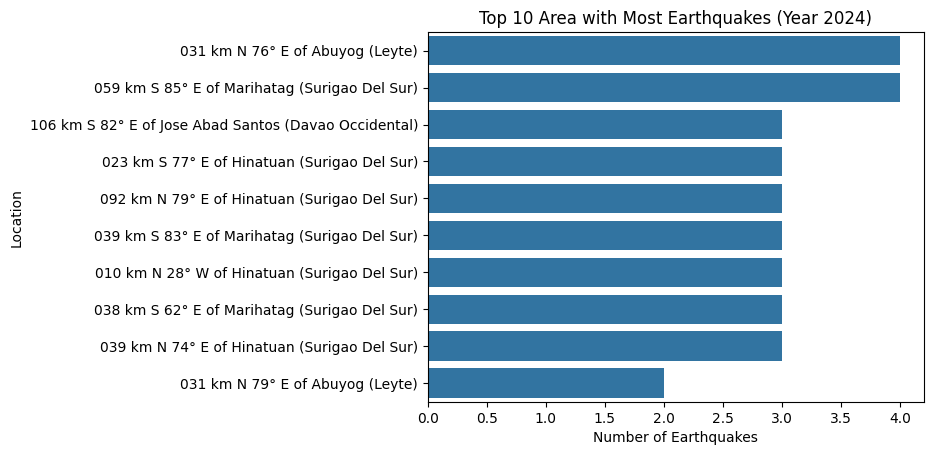

In [ ]:
top_regions = dataset['Location'].value_counts().head(10)
sns.barplot(x=top_regions.values, y=top_regions.index)
plt.title('Top 10 Area with Most Earthquakes (Year 2024)')
plt.xlabel('Number of Earthquakes')
plt.ylabel('Location')
plt.show()

In [ ]:
# Examining the earthquake dataset suggests that Surigao del Sur experiences a range of earthquake magnitudes followed by Leyte.
# 7 out of 10 is located around surigao del sur, which means they are prone to earthquake

*Note:  Use this format for your other 4 insights.  Remember that the insights are valid patterns that you can extract from data.  You can refer to our slides about these patterns.*